# Exercises in Classification I

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

### 1. Clean the income variable such that it has only two values

In [2]:
df_adult = pd.read_csv("adult.csv")

In [3]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
df_adult = df_adult.replace({"<=50K.": "<=50K", ">50K.": ">50K"})

In [5]:
df_adult["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

### 2. Select as set of minimum two feature variables you want to use to predict income. Do the necessary transformation of these variables.

In [6]:
print(df_adult.isna().sum())
df_adult = df_adult.dropna()

print(df_adult.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
df_adult = df_adult.join(pd.get_dummies(df_adult["workclass"], drop_first=True, dtype=int))
df_adult = df_adult.join(pd.get_dummies(df_adult["education"], drop_first=True, dtype=int))

In [8]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,1,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,...,0,0,0,1,0,0,0,0,0,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,...,0,0,0,1,0,0,0,0,0,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,1,0,0,0,0,0,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,...,0,0,0,1,0,0,0,0,0,0


### 3. Create X and y dataset and split the datasets into training and testing sets

In [9]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college'],
      dtype='object')

In [10]:
X_adult_df = df_adult[['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th', '12th',
       '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc',
       'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool',
       'Prof-school', 'Some-college']]
X_adult_df

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48837,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48840,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
adult_y = df_adult["income"]
adult_y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
48836    <=50K
48837    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47621, dtype: object

In [12]:
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(X_adult_df, adult_y, test_size=0.3, random_state=42)

### 4. Train a KNN classifier to predict the variable income based on the feature variables selected in 2 - try out some different K

In [13]:
def knnSweep(X, y, maxK):
    # We create a 2-D array to store all accuracy values
    accuracy_row_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
    for k in range(2, maxK + 1):
        # Model intializing
        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train, y_train)

        # Predicting on train and test set
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        print("KNN with k={}:".format(k) + " completed")
            
        # Get the accuracy from metrics
        accuracy_train = accuracy_score(y_train, y_pred_train)
        #print("Training accuracy: {}".format(accuracy_train))
        accuracy_test = accuracy_score(y_test, y_pred_test)
        #print("Test accuracy: {}\r\n".format(accuracy_test))

        accuracy_row_list.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

    return pd.DataFrame(accuracy_row_list)

In [14]:
acc_df = knnSweep(X_adult_df, adult_y, 20) # try 40: 18 seems to be max benefit, anything above 23 and it gets worse
acc_df

KNN with k=2: completed
KNN with k=3: completed
KNN with k=4: completed
KNN with k=5: completed
KNN with k=6: completed
KNN with k=7: completed
KNN with k=8: completed
KNN with k=9: completed
KNN with k=10: completed
KNN with k=11: completed
KNN with k=12: completed
KNN with k=13: completed
KNN with k=14: completed
KNN with k=15: completed
KNN with k=16: completed
KNN with k=17: completed
KNN with k=18: completed
KNN with k=19: completed
KNN with k=20: completed


,k,Training accuracy,Test accuracy
0,2,0.750357,0.749202
1,3,0.753689,0.751974
2,4,0.770601,0.763397
3,5,0.755285,0.751470
4,6,0.771917,0.764321
5,7,0.770377,0.763397
6,8,0.772449,0.765580
7,9,0.775248,0.769192
8,10,0.775052,0.768688
9,11,0.774661,0.769192


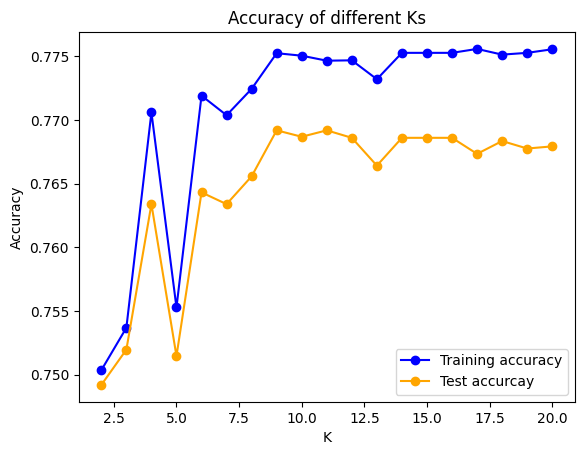

In [15]:
plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'Test accurcay', color='orange', marker='o', linestyle='solid')
    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

### 5. Train a logistic regression classifier to predict the variable income based on the feature variables selected in 2 and compare it to the KNN classifier.

In [16]:
def classifier_score(y_train, y_test, y_pred_train, y_pred_test):
    print("accuracy score train:  ", accuracy_score(y_train, y_pred_train))
    print("accuracy score test:   ", accuracy_score(y_test, y_pred_test))
    
    #print("precision score train: ", precision_score(y_train, y_pred_train))
    #print("precision score test:  ", precision_score(y_test, y_pred_test))
  
    #print("recall score test:     ", recall_score(y_train, y_pred_train))
    #print("recall score test:     ", recall_score(y_test, y_pred_test))

    #print("f1 score test:         ", f1_score(y_train, y_pred_train))
    #print("f1 score test:         ", f1_score(y_test, y_pred_test))

In [17]:
logit_model_sk = linear_model.LogisticRegression()

In [18]:
logit_model_sk.fit(X_adult_train, y_adult_train)

LogisticRegression()

In [19]:
y_log_pred_train = logit_model_sk.predict(X_adult_train)
y_log_pred_test = df = logit_model_sk.predict(X_adult_test)

In [20]:
classifier_score(y_adult_train, y_adult_test, y_log_pred_train, y_log_pred_test)

accuracy score train:   0.7829243415131697
accuracy score test:    0.7744802967732904


In [21]:
y_pred_train_prop = logit_model_sk.predict_proba(X_adult_train)
y_pred_train_prop

array([[0.81442883, 0.18557117],
       [0.96355365, 0.03644635],
       [0.84718641, 0.15281359],
       ...,
       [0.46451535, 0.53548465],
       [0.94460002, 0.05539998],
       [0.83006397, 0.16993603]])

In [22]:
y_pred_train_prop2 = y_pred_train_prop[: , 0]

In [23]:
y_pred_train_prop2.sort()

In [24]:
y_pred_train_prop2 = pd.Series(y_pred_train_prop2)
y_pred_train_prop2

0        0.093566
1        0.093566
2        0.093566
3        0.093566
4        0.093566
           ...   
33329    0.989389
33330    0.989389
33331    0.989389
33332    0.989389
33333    0.989389
Length: 33334, dtype: float64

In [25]:
X_adult_df

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,11th,12th,...,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48837,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48840,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
y_pred_train_prop2

0        0.093566
1        0.093566
2        0.093566
3        0.093566
4        0.093566
           ...   
33329    0.989389
33330    0.989389
33331    0.989389
33332    0.989389
33333    0.989389
Length: 33334, dtype: float64

### 6. Train a decision tree classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree = dtree.fit(X_adult_train, y_adult_train)

In [31]:
y_decision_tree_pred_train = dtree.predict(X_adult_train)
y_decision_tree_pred_test = dtree.predict(X_adult_test)

In [32]:
classifier_score(y_adult_train, y_adult_test, y_decision_tree_pred_train, y_decision_tree_pred_test)

accuracy score train:   0.7841243175136497
accuracy score test:    0.7734303912647862


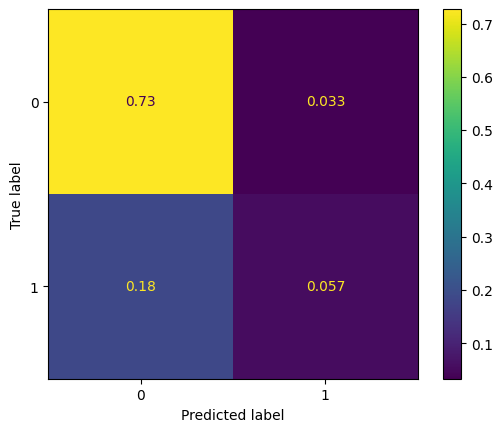

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_adult_train, y_decision_tree_pred_train, normalize='all')).plot()
plt.show()

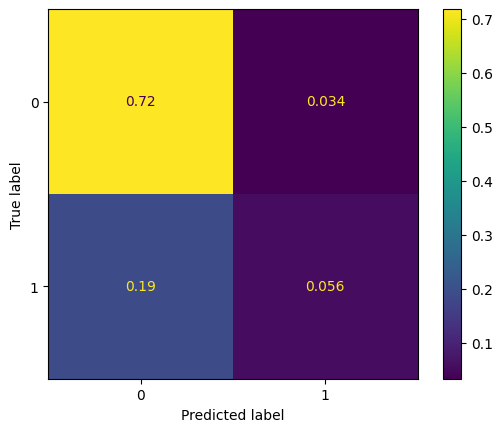

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_adult_test, y_decision_tree_pred_test, normalize='all')).plot()
plt.show()

The decision tree score and the logistic regression scores are exactly the same

### 7. Train a random forest classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [35]:
rf_model = RandomForestClassifier() 
rf_model.fit(X_adult_train, y_adult_train)
y_forest_pred_train = rf_model.predict(X_adult_train)
y_forest_pred_test = rf_model.predict(X_adult_test)

In [36]:
classifier_score(y_adult_train, y_adult_test, y_forest_pred_train, y_forest_pred_test)

accuracy score train:   0.7841243175136497
accuracy score test:    0.7734303912647862


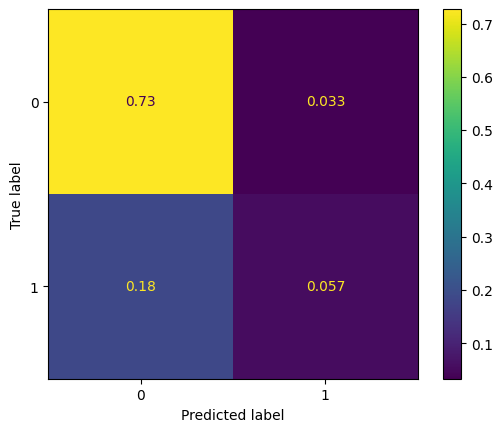

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_adult_train, y_forest_pred_train, normalize='all')).plot()
plt.show()

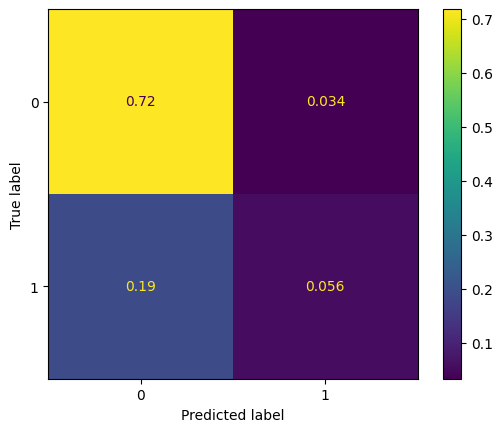

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_adult_test, y_forest_pred_test, normalize='all')).plot()
plt.show()

Very similar to the other test's, this one is ever so sligthly better on the training
and ever so slightly worse on the test, indicating more overfitting

No significant difference

### 8. Train a AdaBoost classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [39]:
ab_model = AdaBoostClassifier(algorithm="SAMME") # algorithm="SAMME" has to be added or else get warning
ab_model.fit(X_adult_train, y_adult_train)
y_ada_pred_train = ab_model.predict(X_adult_train)
y_ada_pred_test = ab_model.predict(X_adult_test)

c:\Users\Bobby\anaconda3\envs\Python_3_10_16\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [40]:
classifier_score(y_adult_train, y_adult_test, y_ada_pred_train, y_ada_pred_test)

accuracy score train:   0.7767144657106858
accuracy score test:    0.769650731434171


This has the exact same score as the decision tree and the logistic regression

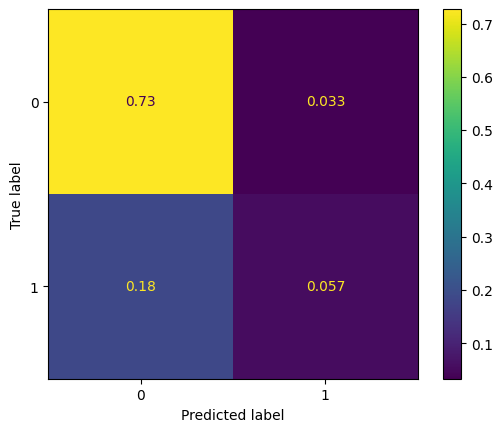

In [41]:
ConfusionMatrixDisplay(confusion_matrix(y_adult_train, y_forest_pred_train, normalize='all')).plot()
plt.show()

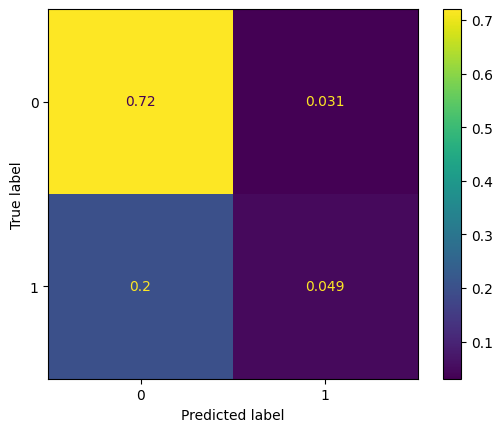

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_adult_test, y_ada_pred_test, normalize='all')).plot()
plt.show()